In [6]:
import pandas as pd
import numpy as np
import scipy as sp                                                         
import scipy.stats as st
from scipy.stats import sem, t
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes
%matplotlib inline
import array
import numpy
import matplotlib.patches as mpatches
from matplotlib import lines

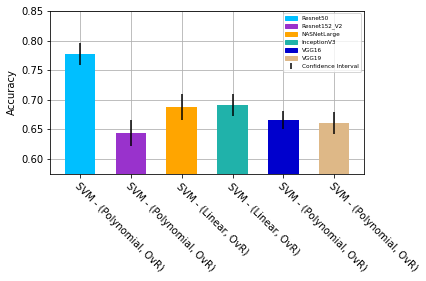

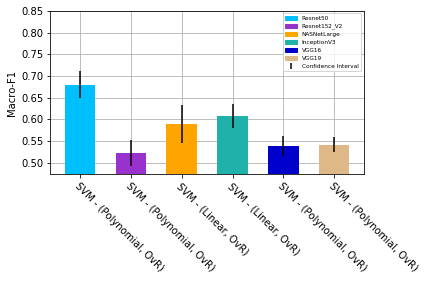

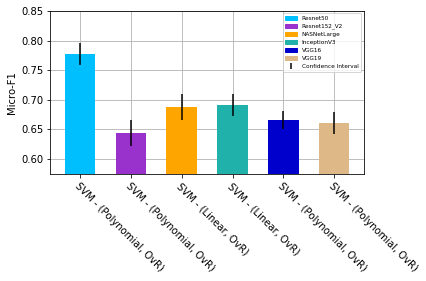

<Figure size 432x288 with 0 Axes>

In [8]:
metricas = ['Accuracy','F1 Macro','F1 Micro']
medidas_pt = ['Accuracy', 'Macro-F1', 'Micro-F1']
errors = ['D.P. - Acurácia','D.P - F1 Macro','D.P - F1 Micro']
colors = ['deepskyblue','darkorchid', 'orange','lightseagreen','mediumblue','burlywood']
folders = ['resnet50', 'resnet152v2', 'nasnetlarge', 'inceptionV3', 'vgg16','vgg19']
names = ['Resnet50', 'Resnet152_V2', 'NASNetLarge', 'InceptionV3', 'VGG16','VGG19']
clfs = ['/SVM - (Polynomial, OvR)','/SVM - (Polynomial, OvR)','/SVM - (Linear, OvR)','/SVM - (Linear, OvR)','/SVM - (Polynomial, OvR)','/SVM - (Polynomial, OvR)']
i = 0
for metrica in metricas:

    j = 0
    nome_config = []
    medidas_baseori = []
    yerrors = []
    for network in folders:
        
#        csv = glob.glob(network+'/'+'*.csv')
        arquivo = pd.read_csv(network+clfs[j]+'.csv')
        plantclefori = arquivo.loc[0, metrica]
        dp = arquivo.loc[0, errors[i]]
        nome_config.append(clfs[j][1:])
        c_interval = st.t.interval(0.95, 9, plantclefori, dp)
        up_lim = c_interval[1]
        down_lim = c_interval[0]
        yerrors.append((up_lim-down_lim)/2)
        medidas_baseori.append(plantclefori)
        j+=1
        # Guarda o menor e o maior valor para ajuste automático da escala do gráfico.
    medidas = medidas_baseori
    escala_menor = np.min(medidas) - 0.07
    escala_maior = np.max(medidas) + 0.073
    if metrica == 'F1 Macro':
        escala_menor = np.min(medidas) - 0.05
        escala_maior = np.max(medidas) + 0.172
    
    # Configura a posição das barras
    bar_larg = 0.6
    base1 = np.arange(len(nome_config))+0.6
    base2 = [x + bar_larg for x in base1]
    #plt.title('Comparativo das melhores configurações paramétricas')
    plt.grid(zorder=0)
#    plt.xlabel('Classificadores')
    plt.ylabel('%s'%medidas_pt[i])
    plt.bar(base1, medidas_baseori, width = bar_larg, label=names[0],color = colors, zorder=3)
    errbar = plt.errorbar(base1, medidas_baseori, yerr= yerrors, label='Confidence Interval', color = 'black', fmt= 'none', zorder=4)    
    resnet50 = mpatches.Patch(color=colors[0], label=names[0])    
    resnet152v2  = mpatches.Patch(color=colors[1], label=names[1])
    nasnetlarge = mpatches.Patch(color=colors[2], label=names[2]) 
    inceptionv3 = mpatches.Patch(color=colors[3], label=names[3])
    vgg16 = mpatches.Patch(color=colors[4], label=names[4])
    vgg19 = mpatches.Patch(color=colors[5], label=names[5])
    plt.xticks([r + bar_larg for r in range(len(nome_config))], nome_config, rotation=-45, ha="left", rotation_mode="anchor")
    plt.ylim([escala_menor, escala_maior]) # Ajusta a escala do gráfico no eixo Y
    plt.legend(handles=[resnet50, resnet152v2, nasnetlarge, inceptionv3, vgg16, vgg19, errbar], fontsize='xx-small', loc = 1)
    plt.tight_layout()
#    plt.set_size_inches(18.5, 10.5)
    plt.savefig(medidas_pt[i]+'.png',dpi=150)
    plt.show()
    plt.clf()
    i = i + 1    
    